In [13]:
from sklearn import tree, ensemble
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Declare classifiers

# Decision Tree
clf_tree = tree.DecisionTreeClassifier()
# Extra Tree
clf_extra_tree = ensemble.ExtraTreesClassifier()
# Random Forest
clf_random_forest = ensemble.RandomForestClassifier()
# Bagging
clf_bagging = ensemble.BaggingClassifier()

clf_tree2 = tree.DecisionTreeClassifier(max_depth=4)

In [15]:
# Test dataset [height, weight, shoe_size]
X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40], [190, 90, 47],
     [175, 64, 39],[177, 70, 40], [159, 55, 37], [171, 75, 42], [181, 85, 43]]

Y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male']

male_measures = np.zeros_like(X)
female_measures = np.zeros_like(X)

In [16]:
# Show gender matrix and means
for n in range(len(Y)):
    if Y[n] == 'male':
        male_measures[n] = X[n]
    elif Y[n] == 'female':
        female_measures[n] = X[n]

male_mean = np.mean(male_measures, axis=0)
female_mean = np.mean(female_measures, axis=0)
print(male_measures)
print(male_mean)
print(female_measures)
print(female_mean)

[[181  80  44]
 [177  70  43]
 [  0   0   0]
 [  0   0   0]
 [166  65  40]
 [190  90  47]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [171  75  42]
 [181  85  43]]
[96.90909091 42.27272727 23.54545455]
[[  0   0   0]
 [  0   0   0]
 [160  60  38]
 [154  54  37]
 [  0   0   0]
 [  0   0   0]
 [175  64  39]
 [177  70  40]
 [159  55  37]
 [  0   0   0]
 [  0   0   0]]
[75.         27.54545455 17.36363636]


In [17]:
# Train the data on the clasifiers
clf_tree = clf_tree.fit(X, Y)
clf_extra_tree = clf_extra_tree.fit(X, Y)
clf_random_forest = clf_random_forest.fit(X, Y)
clf_bagging = clf_bagging.fit(X, Y)

C:\Users\maloq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\maloq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[Text(200.88000000000002, 190.26, 'X[2] <= 41.0\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(133.92000000000002, 135.9, 'X[1] <= 64.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[1] <= 67.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

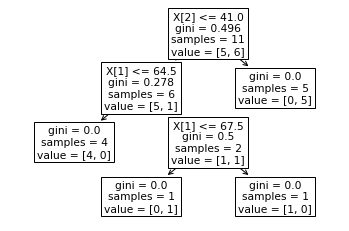

In [18]:
# Plot decision tree
tree.plot_tree(clf_tree)

In [19]:
# Store predictions for test value
test_value = [172, 75, 40]
test_gender = ['male']

prediction_tree = clf_tree.predict([test_value])
prediction_extra_tree = clf_extra_tree.predict([test_value])
prediction_random_forest = clf_random_forest.predict([test_value])
prediction_bagging = clf_bagging.predict([test_value])

In [20]:
# Compare the reusults for the different classifiers and print the correct ones.

predictions = [[prediction_tree, 'Decision Tree'],
               [prediction_extra_tree, 'Extra Tree'],
               [prediction_random_forest, 'Random Forest'],
               [prediction_bagging, 'Bagging']]

correct_predictors = ['','','','']

for n in range(4):
    print(predictions[n][0])
    correct_predictors[n]
    if predictions[n][0] == test_gender:
        correct_predictors[n] = predictions[n][1]
        
print('The correct classifier methods are:', correct_predictors)


['female']
['male']
['male']
['female']
The correct classifier methods are: ['', 'Extra Tree', 'Random Forest', '']
